In [ ]:
"""
  On Class Distributions Induced by Nearest Neighbor Graphs for Node Classification of Tabular Data

  File:     Plotting Theorems.ipynb
  Authors:  Federico Errica (federico.errica@neclab.eu)

NEC Laboratories Europe GmbH, Copyright (c) 2023, All rights reserved.

       THIS HEADER MAY NOT BE EXTRACTED OR MODIFIED IN ANY WAY.

       PROPRIETARY INFORMATION ---

SOFTWARE LICENSE AGREEMENT

ACADEMIC OR NON-PROFIT ORGANIZATION NONCOMMERCIAL RESEARCH USE ONLY

BY USING OR DOWNLOADING THE SOFTWARE, YOU ARE AGREEING TO THE TERMS OF THIS
LICENSE AGREEMENT.  IF YOU DO NOT AGREE WITH THESE TERMS, YOU MAY NOT USE OR
DOWNLOAD THE SOFTWARE.

This is a license agreement ("Agreement") between your academic institution
or non-profit organization or self (called "Licensee" or "You" in this
Agreement) and NEC Laboratories Europe GmbH (called "Licensor" in this
Agreement).  All rights not specifically granted to you in this Agreement
are reserved for Licensor.

RESERVATION OF OWNERSHIP AND GRANT OF LICENSE: Licensor retains exclusive
ownership of any copy of the Software (as defined below) licensed under this
Agreement and hereby grants to Licensee a personal, non-exclusive,
non-transferable license to use the Software for noncommercial research
purposes, without the right to sublicense, pursuant to the terms and
conditions of this Agreement. NO EXPRESS OR IMPLIED LICENSES TO ANY OF
LICENSOR'S PATENT RIGHTS ARE GRANTED BY THIS LICENSE. As used in this
Agreement, the term "Software" means (i) the actual copy of all or any
portion of code for program routines made accessible to Licensee by Licensor
pursuant to this Agreement, inclusive of backups, updates, and/or merged
copies permitted hereunder or subsequently supplied by Licensor,  including
all or any file structures, programming instructions, user interfaces and
screen formats and sequences as well as any and all documentation and
instructions related to it, and (ii) all or any derivatives and/or
modifications created or made by You to any of the items specified in (i).

CONFIDENTIALITY/PUBLICATIONS: Licensee acknowledges that the Software is
proprietary to Licensor, and as such, Licensee agrees to receive all such
materials and to use the Software only in accordance with the terms of this
Agreement.  Licensee agrees to use reasonable effort to protect the Software
from unauthorized use, reproduction, distribution, or publication. All
publication materials mentioning features or use of this software must
explicitly include an acknowledgement the software was developed by NEC
Laboratories Europe GmbH.

COPYRIGHT: The Software is owned by Licensor.

PERMITTED USES:  The Software may be used for your own noncommercial
internal research purposes. You understand and agree that Licensor is not
obligated to implement any suggestions and/or feedback you might provide
regarding the Software, but to the extent Licensor does so, you are not
entitled to any compensation related thereto.

DERIVATIVES: You may create derivatives of or make modifications to the
Software, however, You agree that all and any such derivatives and
modifications will be owned by Licensor and become a part of the Software
licensed to You under this Agreement.  You may only use such derivatives and
modifications for your own noncommercial internal research purposes, and you
may not otherwise use, distribute or copy such derivatives and modifications
in violation of this Agreement.

BACKUPS:  If Licensee is an organization, it may make that number of copies
of the Software necessary for internal noncommercial use at a single site
within its organization provided that all information appearing in or on the
original labels, including the copyright and trademark notices are copied
onto the labels of the copies.

USES NOT PERMITTED:  You may not distribute, copy or use the Software except
as explicitly permitted herein. Licensee has not been granted any trademark
license as part of this Agreement.  Neither the name of NEC Laboratories
Europe GmbH nor the names of its contributors may be used to endorse or
promote products derived from this Software without specific prior written
permission.

You may not sell, rent, lease, sublicense, lend, time-share or transfer, in
whole or in part, or provide third parties access to prior or present
versions (or any parts thereof) of the Software.

ASSIGNMENT: You may not assign this Agreement or your rights hereunder
without the prior written consent of Licensor. Any attempted assignment
without such consent shall be null and void.

TERM: The term of the license granted by this Agreement is from Licensee's
acceptance of this Agreement by downloading the Software or by using the
Software until terminated as provided below.

The Agreement automatically terminates without notice if you fail to comply
with any provision of this Agreement.  Licensee may terminate this Agreement
by ceasing using the Software.  Upon any termination of this Agreement,
Licensee will delete any and all copies of the Software. You agree that all
provisions which operate to protect the proprietary rights of Licensor shall
remain in force should breach occur and that the obligation of
confidentiality described in this Agreement is binding in perpetuity and, as
such, survives the term of the Agreement.

FEE: Provided Licensee abides completely by the terms and conditions of this
Agreement, there is no fee due to Licensor for Licensee's use of the
Software in accordance with this Agreement.

DISCLAIMER OF WARRANTIES:  THE SOFTWARE IS PROVIDED "AS-IS" WITHOUT WARRANTY
OF ANY KIND INCLUDING ANY WARRANTIES OF PERFORMANCE OR MERCHANTABILITY OR
FITNESS FOR A PARTICULAR USE OR PURPOSE OR OF NON- INFRINGEMENT.  LICENSEE
BEARS ALL RISK RELATING TO QUALITY AND PERFORMANCE OF THE SOFTWARE AND
RELATED MATERIALS.

SUPPORT AND MAINTENANCE: No Software support or training by the Licensor is
provided as part of this Agreement.

EXCLUSIVE REMEDY AND LIMITATION OF LIABILITY: To the maximum extent
permitted under applicable law, Licensor shall not be liable for direct,
indirect, special, incidental, or consequential damages or lost profits
related to Licensee's use of and/or inability to use the Software, even if
Licensor is advised of the possibility of such damage.

EXPORT REGULATION: Licensee agrees to comply with any and all applicable
export control laws, regulations, and/or other laws related to embargoes and
sanction programs administered by law.

SEVERABILITY: If any provision(s) of this Agreement shall be held to be
invalid, illegal, or unenforceable by a court or other tribunal of competent
jurisdiction, the validity, legality and enforceability of the remaining
provisions shall not in any way be affected or impaired thereby.

NO IMPLIED WAIVERS: No failure or delay by Licensor in enforcing any right
or remedy under this Agreement shall be construed as a waiver of any future
or other exercise of such right or remedy by Licensor.

GOVERNING LAW: This Agreement shall be construed and enforced in accordance
with the laws of Germany without reference to conflict of laws principles.
You consent to the personal jurisdiction of the courts of this country and
waive their rights to venue outside of Germany.

ENTIRE AGREEMENT AND AMENDMENTS: This Agreement constitutes the sole and
entire agreement between Licensee and Licensor as to the matter set forth
herein and supersedes any previous agreements, understandings, and
arrangements between the parties relating hereto.

       THIS HEADER MAY NOT BE EXTRACTED OR MODIFIED IN ANY WAY.
"""

In [1]:
import torch
from torch.distributions import *
from util import *
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from SED import SED
import numpy as np
#import imageio
import os
#import faiss
from class_separator import ClassSeparator
from torch_geometric.nn import MessagePassing

## Plot result of Proposition 3.2

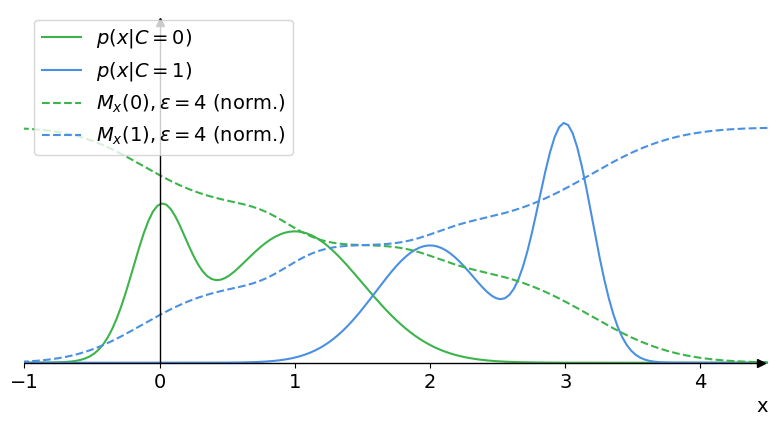

In [9]:
fig1_means = torch.Tensor([[0., 1], [2, 3]]).unsqueeze(2).double()
fig1_std = torch.Tensor([[0.2, 0.5], [0.4, 0.2]]).unsqueeze(2).double()
weights = torch.Tensor([[0.3, 0.7], [0.5, 0.5]]).double()
p_c = torch.Tensor([0.5, 0.5]).double()

fig, ax = plt.subplots(figsize=(8, 4.5))

# these limits are for computation
min_x = -10
max_x = 10

plot_gaussian_mixture(ax, 
                      fig1_means[0],
                      fig1_std[0],
                      weights[0],
                      min_x=min_x,
                      max_x=max_x,
                      steps=600,
                      color="#3CB44B",
                      label=r'$p(x|C=0)$')

plot_gaussian_mixture(ax, 
                      fig1_means[1],
                      fig1_std[1],
                      weights[1],
                      min_x=min_x,
                      max_x=max_x,
                      steps=600,
                      color="#4A90E2",
                      label=r'$p(x|C=1)$')

# Pick an epsilon
epsilon = 4
normalize = True

if not normalize:
    plot_M_x(ax,
             epsilon,
             fig1_means,
             fig1_std,
             weights,
             p_c,
             normalize=False,
             min_x=min_x,
             max_x=max_x,
             steps = 600,
             colors = ['#3CB44B','#4A90E2'],
             labels = [fr'$M_x(0), \varepsilon={epsilon}$', fr'$M_x(1), \varepsilon={epsilon}$'])
else:
    plot_M_x(ax,
             epsilon,
             fig1_means,
             fig1_std,
             weights,
             p_c,
             normalize=True,
             min_x=min_x,
             max_x=max_x,
             steps = 600,
             colors = ['#3CB44B','#4A90E2'],
             labels = [fr'$M_x(0), \varepsilon={epsilon}$ (norm.)', fr'$M_x(1), \varepsilon={epsilon}$ (norm.)'])

# these limits are for plotting
xmin, xmax, ymin, ymax = -1, 4.5,-0.1, 1.5
add_axes(ax, use_y_ticks=False, axis_range=[xmin, xmax, ymin, ymax])
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Please Note
#### It is possible that, well outside the the range of the two mixtures, there is an inversion of trend and, e.g., the blue curve intersects the green curve on the right as it decreases faster (depends on the standard deviations).
#### The consequence is that, if the green distribution decreases more slowly than the blue one, that on the far right it becomes more likely to sample a node of the first class.

## Compute animation for M_x(c)

In [10]:
def plot_M_x_animation(epsilon):

    fig, ax = plt.subplots(figsize=(8, 4.5))
    
    plot_gaussian_mixture(ax, 
                          fig1_means[0],
                          fig1_std[0],
                          weights[0],
                          min_x=-5,
                          max_x=5,
                          steps=600,
                          color="#3CB44B",
                          label=r'$p(x|C=0)$')

    plot_gaussian_mixture(ax, 
                          fig1_means[1],
                          fig1_std[1],
                          weights[1],
                          min_x=-5,
                          max_x=5,
                          steps=600,
                          color="#4A90E2",
                          label=r'$p(x|C=1)$')

    plot_M_x(ax,
         epsilon,
         fig1_means,
         fig1_std,
         weights,
         p_c,
         normalize=True,
         min_x = -5,
         max_x = 5,
         steps = 600,
         colors = ['#3CB44B','#4A90E2'],
         labels = [fr'$M_x(0), \varepsilon={epsilon:.1f}$ (norm.)', fr'$M_x(1), \varepsilon={epsilon:.1f}$ (norm.)'])
    
    xmin, xmax, ymin, ymax = -1., 4.5, -0.1, 1.5
    add_axes(ax, use_y_ticks=False, axis_range=[xmin, xmax, ymin, ymax])
    plt.legend(loc='upper left')
    plt.tight_layout()
    
    # IMPORTANT ANIMATION CODE HERE

    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

imageio.mimsave('images/m_x_new_example.gif', [plot_M_x_animation(e.double()) for e in torch.arange(0.1, 10.1, 0.1)], duration=50)

NameError: name 'imageio' is not defined

## Plot result of Theorem 3.4

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4.5))

# Pick an epsilon
epsilon = 1
normalize = True

if not normalize:
    plot_M_c(ax,
             epsilon,
             fig1_means,
             fig1_std,
             weights,
             p_c,
             normalize=False)
else:
    plot_M_c(ax,
             epsilon,
             fig1_means,
             fig1_std,
             weights,
             p_c,
             normalize=True)

# these limits are for plotting
plt.xlabel(fr'$\varepsilon = {epsilon:.1f}$')   
plt.tight_layout()
plt.show()

## Compute animation for M_c'(c)

In [ ]:
def plot_M_c_animation(epsilon):

    fig, ax = plt.subplots(figsize=(8, 4.5))
    
    plot_M_c(ax,
         epsilon,
         fig1_means,
         fig1_std,
         weights,
         p_c,
         normalize=True)
    
    plt.xlabel(fr'$\varepsilon = {epsilon:.1f}$') 
    plt.tight_layout()
    
    # IMPORTANT ANIMATION CODE HERE

    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image
imageio.mimsave('images/m_c_new_example.gif', [plot_M_c_animation(e.double()) for e in torch.arange(0.1, 10.1, 0.1)], duration=50)

tensor([1.0000e-08, 1.0000e-02, 2.0000e-02,  ..., 1.0980e+01, 1.0990e+01,
        1.1000e+01])


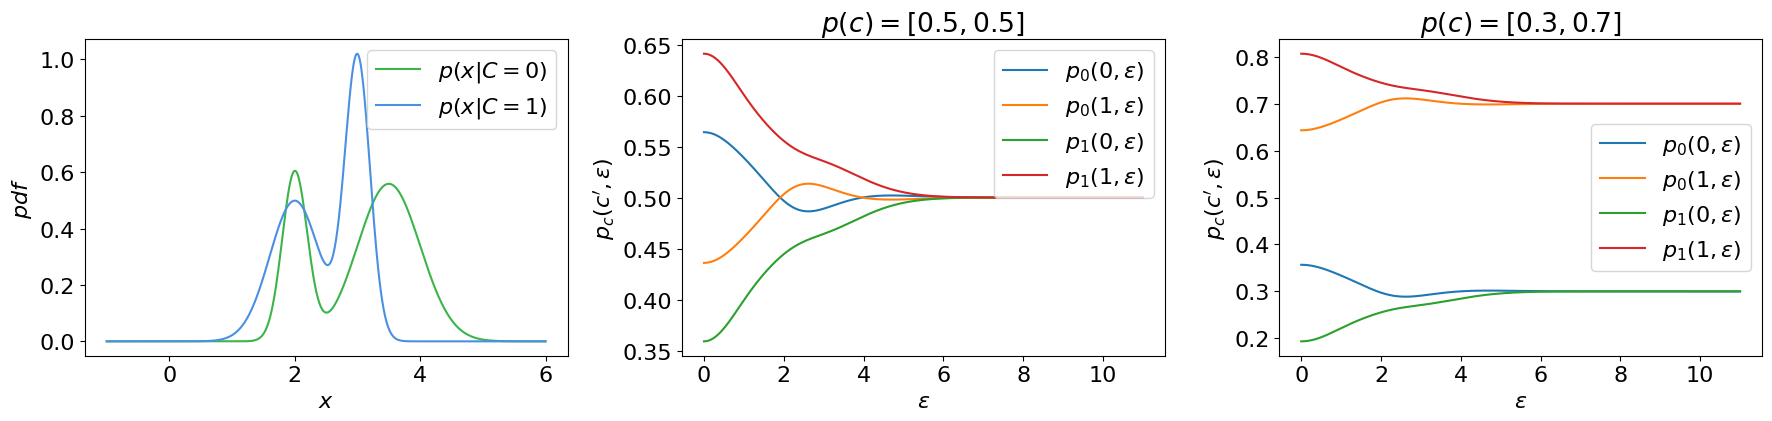

In [4]:

fig1_means = torch.Tensor([[2., 3.5], [2, 3]]).unsqueeze(2).double()
fig1_std = torch.Tensor([[0.2, 0.5], [0.4, 0.2]]).unsqueeze(2).double()
weights = torch.Tensor([[0.3, 0.7], [0.5, 0.5]]).double()
p_c = torch.Tensor([0.5, 0.5]).double()

plt.rcParams["font.size"] = 16  # Adjust the font size as needed

fig, ax = plt.subplots(1, 3, figsize=(18, 4.5))

# these limits are for computation
min_x = -1
max_x = 6

plot_gaussian_mixture(ax[0], 
                      fig1_means[0],
                      fig1_std[0],
                      weights[0],
                      min_x=min_x,
                      max_x=max_x,
                      steps=600,
                      color="#3CB44B",
                      label=r'$p(x|C=0)$')

plot_gaussian_mixture(ax[0], 
                      fig1_means[1],
                      fig1_std[1],
                      weights[1],
                      min_x=min_x,
                      max_x=max_x,
                      steps=600,
                      color="#4A90E2",
                      label=r'$p(x|C=1)$')

# epsilons = [1e-2, 1, 3, 5, 10]
epsilons = torch.arange(1e-8, 11 + 1e-2, 1e-2)

print(epsilons)

M_C = []
for epsilon in epsilons:
    m_c = M_c(
        epsilon,
        p_c,
        weights,
        fig1_means,
        fig1_std,
        normalize=True,
    )
    M_C.append(m_c)
    # print(epsilon)
    # print(m_c.numpy())

M_C = torch.stack(M_C, dim=-1)
ax[1].plot(epsilons, M_C[0,0], label=r'$p_0(0, \varepsilon)$')
ax[1].plot(epsilons, M_C[0,1], label=r'$p_0(1, \varepsilon)$')
ax[1].plot(epsilons, M_C[1,0], label=r'$p_1(0, \varepsilon)$')
ax[1].plot(epsilons, M_C[1,1], label=r'$p_1(1, \varepsilon)$')


p_c = torch.Tensor([0.3, 0.7]).double()

M_C = []
for epsilon in epsilons:
    m_c = M_c(
        epsilon,
        p_c,
        weights,
        fig1_means,
        fig1_std,
        normalize=True,
    )
    M_C.append(m_c)
    # print(epsilon)
    # print(m_c.numpy())

M_C = torch.stack(M_C, dim=-1)
ax[2].plot(epsilons, M_C[0,0], label=r'$p_0(0, \varepsilon)$')
ax[2].plot(epsilons, M_C[0,1], label=r'$p_0(1, \varepsilon)$')
ax[2].plot(epsilons, M_C[1,0], label=r'$p_1(0, \varepsilon)$')
ax[2].plot(epsilons, M_C[1,1], label=r'$p_1(1, \varepsilon)$')


ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$pdf$')
ax[0].legend()

ax[1].set_title(r'$p(c)=[0.5, 0.5]$')
ax[1].set_xlabel(r'$\varepsilon$')
ax[1].set_ylabel(r"$p_c(c', \varepsilon)$")
ax[1].legend(loc='upper right')

ax[2].set_title(r'$p(c)=[0.3, 0.7]$')
ax[2].set_xlabel(r'$\varepsilon$')
ax[2].set_ylabel(r"$p_c(c', \varepsilon)$")
ax[2].legend()
plt.tight_layout()

plt.savefig('images/theoretical_analysis_m_x_eps.pdf')

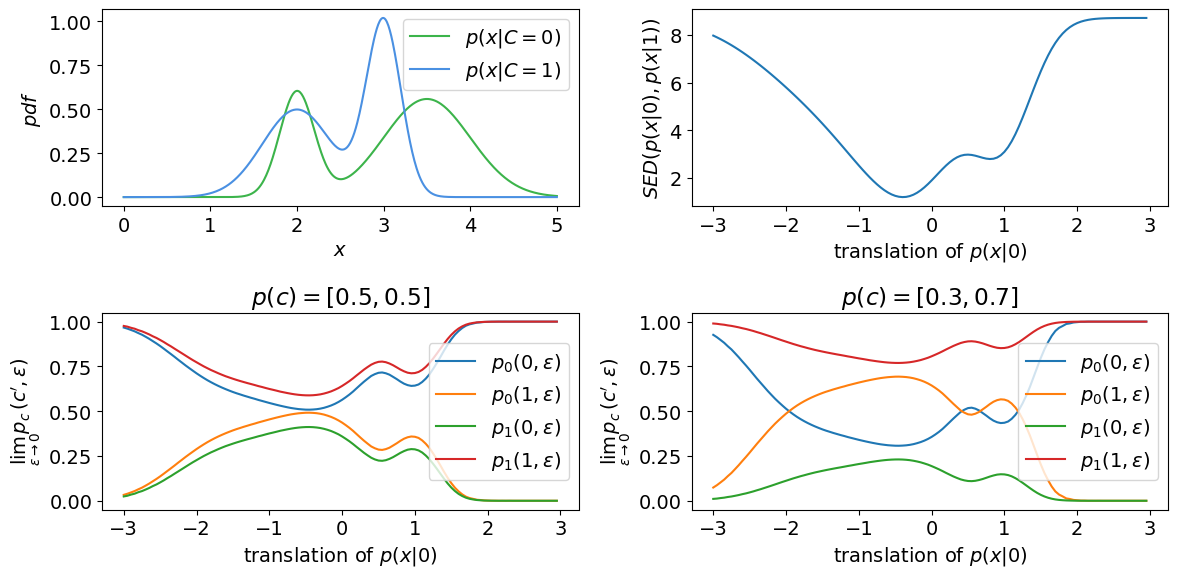

In [2]:
fig1_means = torch.Tensor([[2, 3.5], [2, 3]]).unsqueeze(2).double()
fig1_std = torch.Tensor([[0.2, 0.5], [0.4, 0.2]]).unsqueeze(2).double()
weights = torch.Tensor([[0.3, 0.7], [0.5, 0.5]]).double()
p_c = torch.Tensor([0.5, 0.5]).double()

plt.rcParams["font.size"] = 14  # Adjust the font size as needed

# these limits are for computation
min_x = 0
max_x = 5

translations = torch.arange(-3, 3, 0.05)

fig, ax = plt.subplots(2, 2, figsize=(12, 6))

plot_gaussian_mixture(ax[0,0], 
                      fig1_means[0],
                      fig1_std[0],
                      weights[0],
                      min_x=min_x,
                      max_x=max_x,
                      steps=600,
                      color="#3CB44B",
                      label=r'$p(x|C=0)$')

plot_gaussian_mixture(ax[0,0], 
                      fig1_means[1],
                      fig1_std[1],
                      weights[1],
                      min_x=min_x,
                      max_x=max_x,
                      steps=600,
                      color="#4A90E2",
                      label=r'$p(x|C=1)$')

M_C = []
epsilon = 1e-13
for translation in translations:
    # Translate means and observe behavior
    new_fig1_means = fig1_means.clone()
    new_fig1_means[0] += translation
    
    m_c = M_c(
        epsilon,
        p_c,
        weights,
        new_fig1_means,
        fig1_std,
        normalize=True,
    )
    M_C.append(m_c)

M_C = torch.stack(M_C, dim=-1)
ax[1,0].plot(translations, M_C[0,0], label=r'$p_0(0, \varepsilon)$')
ax[1,0].plot(translations, M_C[0,1], label=r'$p_0(1, \varepsilon)$')
ax[1,0].plot(translations, M_C[1,0], label=r'$p_1(0, \varepsilon)$')
ax[1,0].plot(translations, M_C[1,1], label=r'$p_1(1, \varepsilon)$')


p_c = torch.Tensor([0.3, 0.7]).double()

M_C = []
for translation in translations:
    # Translate means and observe behavior
    new_fig1_means = fig1_means.clone()
    new_fig1_means[0] += translation
    
    m_c = M_c(
        epsilon,
        p_c,
        weights,
        new_fig1_means,
        fig1_std,
        normalize=True,
    )
    M_C.append(m_c)


M_C = torch.stack(M_C, dim=-1)
ax[1,1].plot(translations, M_C[0,0], label=r'$p_0(0, \varepsilon)$')
ax[1,1].plot(translations, M_C[0,1], label=r'$p_0(1, \varepsilon)$')
ax[1,1].plot(translations, M_C[1,0], label=r'$p_1(0, \varepsilon)$')
ax[1,1].plot(translations, M_C[1,1], label=r'$p_1(1, \varepsilon)$')


seds = []
for translation in translations:
    # Translate means and observe behavior
    new_fig1_means = fig1_means.clone()
    new_fig1_means[0] += translation
    
    seds.append(SED(weights[0],
        new_fig1_means[0],
        fig1_std[0],
        weights[1],
        fig1_means[1],
        fig1_std[1]).item())

ax[0,1].plot(translations, seds)

ax[0,0].set_xlabel(r'$x$')
ax[0,0].set_ylabel(r'$pdf$')
ax[0,0].legend()

ax[1,0].set_title(r'$p(c)=[0.5, 0.5]$')
ax[1,0].set_xlabel(r'translation of $p(x|0)$')
ax[1,0].set_ylabel(r"$\lim_{\varepsilon \rightarrow 0}p_c(c', \varepsilon)$")
ax[1,0].legend()

ax[1,1].set_title(r'$p(c)=[0.3, 0.7]$')
ax[1,1].set_xlabel(r'translation of $p(x|0)$')
ax[1,1].set_ylabel(r"$\lim_{\varepsilon \rightarrow 0}p_c(c', \varepsilon)$")
ax[1,1].legend()

ax[0,1].set_xlabel(r'translation of $p(x|0)$')
ax[0,1].set_ylabel(r'$SED(p(x|0), p(x|1))$')

plt.tight_layout()    
    
plt.savefig('images/theoretical_analysis_lim_m_c_eps.pdf')

## Test SED for a couple of examples

In [ ]:
fig1_means = torch.Tensor([[0.3, 2], [2, 3]]).unsqueeze(2).double()
fig1_std = torch.Tensor([[0.2, 2], [0.4, 0.2]]).unsqueeze(2).double()
weights = torch.Tensor([[0.3, 0.7], [0.5, 0.5]]).double()
p_c = torch.Tensor([0.5, 0.5]).double()

fig, ax = plt.subplots(figsize=(8, 4.5))

# these limits are for computation
min_x = -10
max_x = 10


# Translate means and observe behavior
fig1_means[0] += 0

plot_gaussian_mixture(ax, 
                      fig1_means[0],
                      fig1_std[0],
                      weights[0],
                      min_x=-10,
                      max_x=10,
                      steps=600,
                      color="#3CB44B",
                      label=r'$p(x|C=0)$')

plot_gaussian_mixture(ax, 
                      fig1_means[1],
                      fig1_std[1],
                      weights[1],
                      min_x=-10,
                      max_x=10,
                      steps=600,
                      color="#4A90E2",
                      label=r'$p(x|C=1)$')

In [ ]:
def plot_SED_animation(translation):

    fig1_means = torch.Tensor([[0.3, 2], [2, 3]]).unsqueeze(2).double()
    fig1_std = torch.Tensor([[0.2, 2], [0.4, 0.2]]).unsqueeze(2).double()
    weights = torch.Tensor([[0.3, 0.7], [0.5, 0.5]]).double()
    p_c = torch.Tensor([0.5, 0.5]).double()

    fig, ax = plt.subplots(figsize=(8, 4.5))

    # these limits are for computation
    min_x = -10
    max_x = 10


    # Translate means and observe behavior
    fig1_means[0] += translation

    plot_gaussian_mixture(ax, 
                          fig1_means[0],
                          fig1_std[0],
                          weights[0],
                          min_x=-6,
                          max_x=10,
                          steps=600,
                          color="#3CB44B",
                          label=r'$p(x|C=0)$')

    plot_gaussian_mixture(ax, 
                          fig1_means[1],
                          fig1_std[1],
                          weights[1],
                          min_x=-6,
                          max_x=10,
                          steps=600,
                          color="#4A90E2",
                          label=r'$p(x|C=1)$')
    
    sed = SED(weights[0],
              fig1_means[0],
              fig1_std[0],
              weights[1],
              fig1_means[1],
              fig1_std[1])
    
    plt.xlabel(fr'$SED = {sed:.2f}$') 
    plt.tight_layout()
    
    # IMPORTANT ANIMATION CODE HERE

    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

imageio.mimsave('images/SED.gif', [plot_SED_animation(e.double()) for e in torch.arange(-4, 8.1, 0.1)], duration=100)

# Plot Distribution Learned by ClassSeparator

In [ ]:
import torch
from torch.distributions import *
from util import *
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from SED import SED
import numpy as np
import imageio
import os 
import faiss  
from model import ClassSeparator
from torch_geometric.nn import MessagePassing

num_classes = 2
num_mixtures = 2
num_features = 2
k = 5
seed = 42

model = ClassSeparator(
    num_classes=num_classes,
    num_mixtures=num_mixtures,
    num_features=num_features,
    k=k,
)

model_ckpt_pth = f"C_{num_classes}_M_{num_mixtures}_D_{num_features}_k_{k}_seed_{seed}.pth"
p = os.path.join("./checkpoints", model_ckpt_pth)
model.load_state_dict(
    torch.load(
        p,
        map_location="cpu",
    )
)
model.eval()
print(f'epsilon is {model.epsilon}')

In [ ]:
prior, weights, mean, std = model.get_parameters()

In [ ]:
for class_id in [None, 0, 1]:
    fig = plt.figure()
    X, Y = np.mgrid[-4.5:6.1:0.1, -4.5:6.1:0.1]
    pos  = torch.tensor(np.dstack((X, Y)))
    l = model.get_log_likelihood_original_distribution(pos, class_id=class_id)
    plt.contour(X, Y, l.exp().detach().numpy(), levels=200)
    plt.colorbar()

In [ ]:
for class_id in [0, 1]:
    fig = plt.figure()
    X, Y = np.mgrid[-4.5:6.1:0.1, -4.5:6.1:0.1]
    pos  = torch.tensor(np.dstack((X, Y)))
    l = model.get_log_likelihood_embedding_distribution(pos, class_id=class_id)
    plt.contour(X, Y, l.exp().detach().numpy(), levels=300)
    plt.colorbar()

### Sample a dataset with learned data distribution

In [ ]:
X, y = model.sample_data(num_samples=5000)

In [ ]:
mask_0 = y == 0
mask_1 = y == 1
plt.scatter(X[mask_0,0], X[mask_0,1], alpha=0.3)
plt.scatter(X[mask_1,0], X[mask_1,1], alpha=0.3)

### Build kNN graph and check the distribution of the average distances around each point. Compare the distribution with epsilon of the model.

In [ ]:
index = faiss.IndexFlatL2(X.shape[1])   # build the index
index.add(X)                  # add vectors to the index

D, I = index.search(X, model.k + 1)
D, I = D[:, 1:], I[:, 1:]  # remove self loop
knn_edge_index = torch.stack([torch.tensor(I, dtype=torch.long).reshape(-1),
                              torch.cat([torch.zeros(model.k, dtype=torch.long)+i for i in range(X.shape[0])], dim=0)],
                             dim=0)

sns.kdeplot(D.mean(-1), clip=(0.0, 0.25))  # take average wrt the neighboring distance of each point
plt.axvline(model.epsilon.item(), linestyle='--')

In [ ]:
class MeanAggregator(MessagePassing):
    
    def __init__(self):
        super().__init__(aggr='mean')  # mean aggregation as in paper
    
    def forward(self, x, edge_index):
        out = self.propagate(x=x, edge_index=edge_index)
        return out
    
    def message(self, x_j):
        return x_j

dgn = MeanAggregator()
H = dgn(X, knn_edge_index)
H_class_0 = H[mask_0]
H_class_1 = H[mask_1]

In [ ]:
data_X_0 = pd.DataFrame(X[mask_0].detach().numpy(), columns=['x1','x2'])
data_X_1 = pd.DataFrame(X[mask_1].detach().numpy(), columns=['x1','x2'])
data_H_0 = pd.DataFrame(H_class_0.detach().numpy(), columns=['x1','x2'])
data_H_1 = pd.DataFrame(H_class_1.detach().numpy(), columns=['x1','x2'])
data_X = pd.DataFrame(X.detach().numpy(), columns=['x1','x2'])
data_H = pd.DataFrame(H.detach().numpy(), columns=['x1','x2'])

plt.figure()
sns.kdeplot(
    data=data_X, x="x1", y="x2",
    fill=False, thresh=0, levels=1000, cmap="mako",
)
plt.figure()
sns.kdeplot(
    data=data_H, x="x1", y="x2",
    fill=False, thresh=0, levels=1000, cmap="mako",
)

In [ ]:
mask_0 = y == 0
mask_1 = y == 1
plt.figure()
plt.scatter(X[mask_0,0], X[mask_0,1], alpha=0.3)
plt.scatter(X[mask_1,0], X[mask_1,1], alpha=0.3)
plt.figure()
plt.scatter(H[mask_0,0], H[mask_0,1], alpha=0.3)
plt.scatter(H[mask_1,0], H[mask_1,1], alpha=0.3)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
scores = []
for random_state in range(5):
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                        hidden_layer_sizes=(20, 2), random_state=random_state, max_iter=1000)
    clf.fit(X.detach().numpy(), y.detach().numpy())
    scores.append(roc_auc_score(y, clf.predict(X.detach().numpy())))
print(np.mean(scores), np.std(scores))

In [ ]:
scores = []
for random_state in range(5):
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                        hidden_layer_sizes=(20, 2), random_state=random_state, max_iter=1000)
    clf.fit(H.detach().numpy(), y.detach().numpy())
    scores.append(roc_auc_score(y, clf.predict(H.detach().numpy())))
print(np.mean(scores), np.std(scores))

## Check the behavior of SED(H,H) wrt k. Is it upper bounded by SED(X,X)?

In [ ]:
num_classes = 2
num_mixtures = 5
num_features = 3

torch.manual_seed(seed)

plt.figure()
for t in range(10):
    model = ClassSeparator(
        num_classes=num_classes,
        num_mixtures=num_mixtures,
        num_features=num_features,
        k=1,
    )
    model.epsilon.data = torch.tensor([3.])
    model.eval()

    sed_x = model.compute_SED_X(c=0, c_prime=1)

    x_list = []
    y_list = []

    for k in range(0, 200):
        model.k.data = torch.tensor([k], dtype=torch.double)

        sed_h = model.compute_SED_H(c=0, c_prime=1)

        x_list.append(k)
        y_list.append(sed_h.detach().numpy())
        
        assert sed_h.item() < sed_x.item()
    
    # print(y_list[0])
    plt.plot(x_list, y_list)
    plt.axhline(sed_x.detach().numpy(), linestyle='--', alpha=0.5)

plt.xlabel(r'$k$')
plt.ylabel(r'$SED(H_0, H_1)$')
plt.tight_layout()